In [1]:
!pip install -q pandas numpy scikit-learn matplotlib seaborn kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [3]:
# Install dependency (run once per environment)
# pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Correct file path inside the dataset
file_path = "House_Rent_Dataset.csv"

# Load dataset into pandas DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "iamsouravbanerjee/house-rent-prediction-dataset",
    file_path
)

print("First 5 records:")
df.head()


100%|██████████| 554k/554k [00:00<00:00, 10.1MB/s]

First 5 records:


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


# ***EDA***

In [6]:
print("-"*60)
print("DATASET INFORMATION")
print("-"*60)
print(f"\nDataset Shape: {df.shape}")
print(f"\nColumn Names and Data Types:\n{df.dtypes}")
print(f"\nBasic Statistics:\n{df.describe()}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

------------------------------------------------------------
DATASET INFORMATION
------------------------------------------------------------

Dataset Shape: (4746, 12)

Column Names and Data Types:
Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

Basic Statistics:
               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000 

# ***DATA PREPROCESSING & LINEAR REGRESSION MODEL***

In [7]:
# Step 1: Extract features (X) and target (y)
X = df.drop('Rent', axis=1)
y = df['Rent']

# Drop 'Posted On' (date column) and select only numeric and categorical columns for encoding
X = X.drop(['Posted On'], axis=1, errors='ignore')

# Identify columns to encode (exclude numeric ones)
numeric_cols = ['BHK', 'Rent', 'Size', 'Bathroom']
categorical_cols = [col for col in X.columns if col not in numeric_cols]

# One-hot encode only categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Feature shape after encoding: {X_encoded.shape}")
print(f"Target shape: {y.shape}")

# Remove 'Rent' from features if it's still there
if 'Rent' in X_encoded.columns:
    X_encoded = X_encoded.drop('Rent', axis=1)

X_final = X_encoded

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print(f"\nTrain set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data preprocessing completed!")

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✓ Model trained successfully!")

# Make Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("✓ Predictions generated!")

# Model Evaluation
print("\n" + "="*60)
print("LINEAR REGRESSION MODEL - EVALUATION RESULTS")
print("="*60)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTRAINING SET:")
print(f"  MAE:  ₹{train_mae:,.2f}")
print(f"  RMSE: ₹{train_rmse:,.2f}")
print(f"  R²:   {train_r2:.4f}")

print("\nTEST SET:")
print(f"  MAE:  ₹{test_mae:,.2f}")
print(f"  RMSE: ₹{test_rmse:,.2f}")
print(f"  R²:   {test_r2:.4f}")

print(f"\nModel Intercept: ₹{model.intercept_:,.2f}")
print(f"Number of Features: {X_final.shape[1]}")
print(f"\n✔ Model Training Completed Successfully!")

Feature shape after encoding: (4746, 2729)
Target shape: (4746,)

Train set size: 3796
Test set size: 950

✓ Data preprocessing completed!
✓ Model trained successfully!
✓ Predictions generated!

LINEAR REGRESSION MODEL - EVALUATION RESULTS

TRAINING SET:
  MAE:  ₹9,649.11
  RMSE: ₹45,651.49
  R²:   0.6856

TEST SET:
  MAE:  ₹65,025.71
  RMSE: ₹112,998.18
  R²:   -2.2039

Model Intercept: ₹35,151.52
Number of Features: 2729

✔ Model Training Completed Successfully!


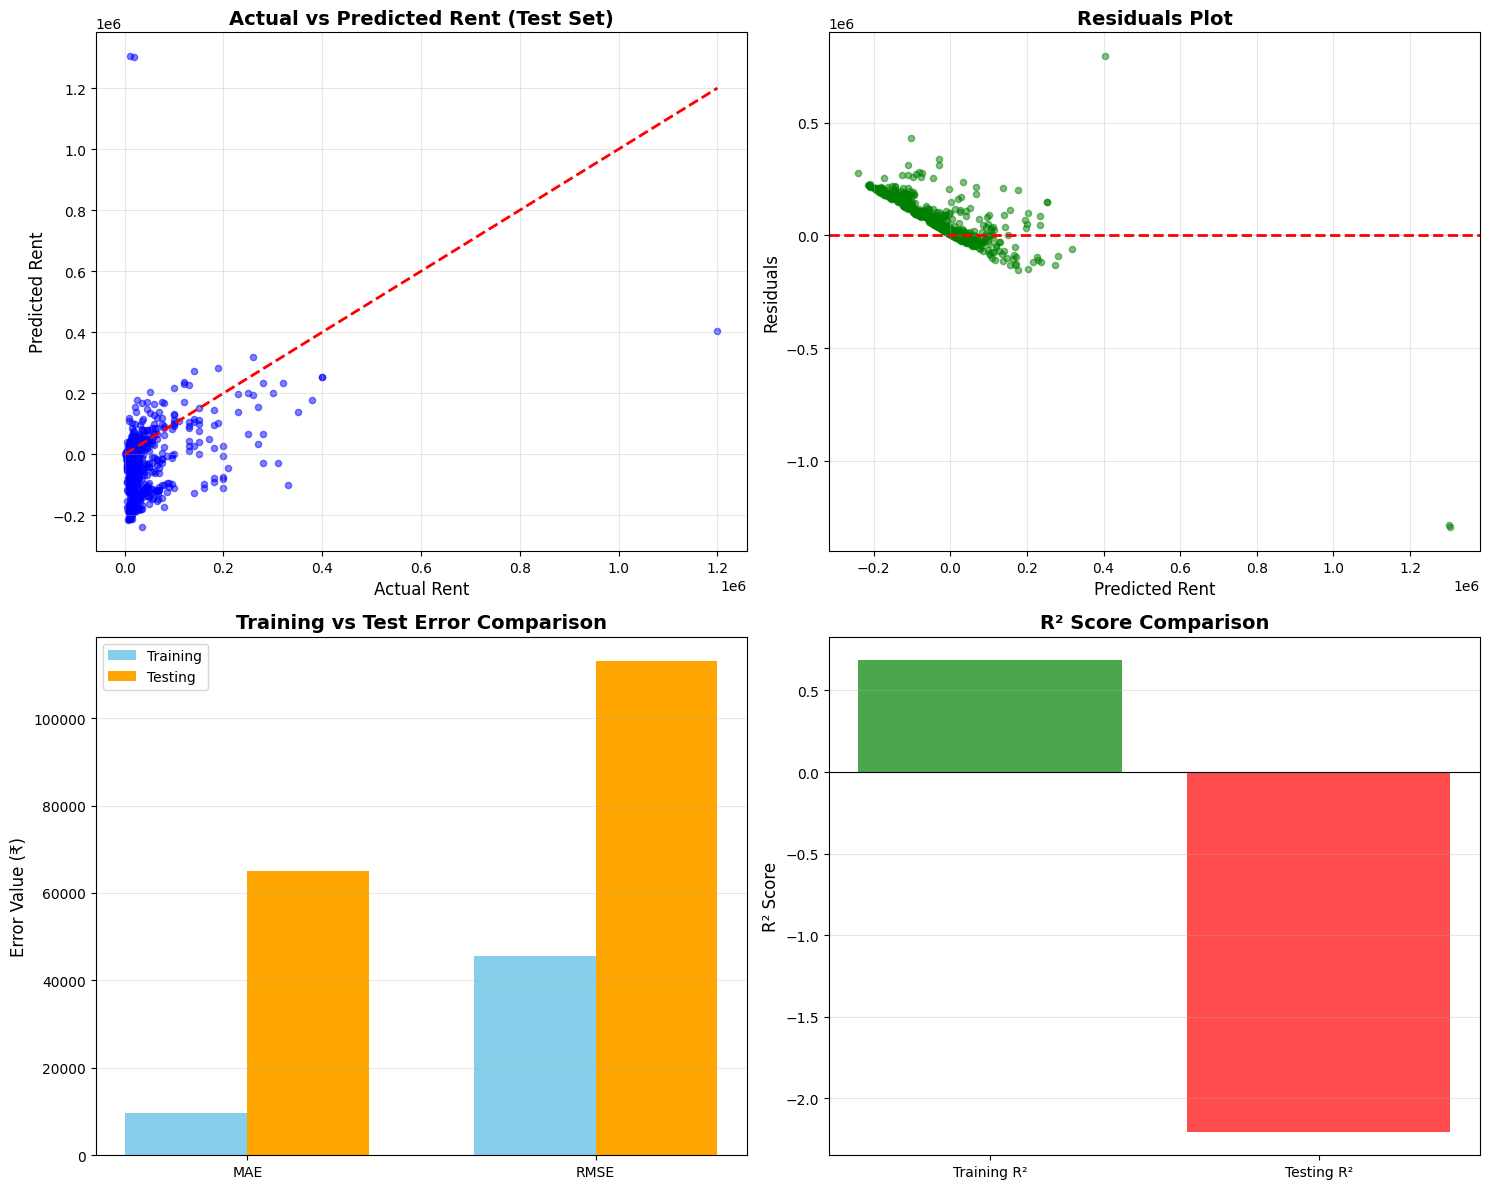


✓ Visualizations created successfully!


In [8]:
# Step 4: Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Rent', fontsize=12)
axes[0, 0].set_ylabel('Predicted Rent', fontsize=12)
axes[0, 0].set_title('Actual vs Predicted Rent (Test Set)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals Distribution
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, s=20, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Rent', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residuals Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Training vs Test Error
metrics = ['MAE', 'RMSE']
train_errors = [train_mae, train_rmse]
test_errors = [test_mae, test_rmse]

x_pos = np.arange(len(metrics))
width = 0.35

axes[1, 0].bar(x_pos - width/2, train_errors, width, label='Training', color='skyblue')
axes[1, 0].bar(x_pos + width/2, test_errors, width, label='Testing', color='orange')
axes[1, 0].set_ylabel('Error Value (₹)', fontsize=12)
axes[1, 0].set_title('Training vs Test Error Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metrics)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: R² Score Comparison
scores = ['Training R²', 'Testing R²']
r2_values = [train_r2, test_r2]
colors = ['green' if x > 0 else 'red' for x in r2_values]

axes[1, 1].bar(scores, r2_values, color=colors, alpha=0.7)
axes[1, 1].set_ylabel('R² Score', fontsize=12)
axes[1, 1].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[1, 1].axhline(y=0, color='black', linestyle='-', lw=0.8)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Visualizations created successfully!")

In [9]:
# Final Summary & Conclusions
print("\n" + "="*70)
print(" "*15 + "HOUSE RENT PREDICTION - FINAL REPORT")
print("="*70)

print("\n📋 PROJECT OVERVIEW")
print("-" * 70)
print(f"Dataset: Kaggle House Rent Prediction Dataset")
print(f"Total Records: {len(df):,}")
print(f"Features After Encoding: {X_final.shape[1]:,}")
print(f"Training Samples: {len(X_train):,}")
print(f"Test Samples: {len(X_test):,}")

print("\n📈 MODEL PERFORMANCE SUMMARY")
print("-" * 70)
print(f"\nTraining Metrics:")
print(f"  • Mean Absolute Error (MAE):  ₹{train_mae:>12,.2f}")
print(f"  • Root Mean Squared Error:    ₹{train_rmse:>12,.2f}")
print(f"  • R² Score:                  {train_r2:>15.4f}")

print(f"\nTest Metrics:")
print(f"  • Mean Absolute Error (MAE):  ₹{test_mae:>12,.2f}")
print(f"  • Root Mean Squared Error:    ₹{test_rmse:>12,.2f}")
print(f"  • R² Score:                  {test_r2:>15.4f}")

print("\n💡 KEY FINDINGS & INSIGHTS")
print("-" * 70)
print(f"\n1. OVERFITTING DETECTED:")
print(f"   Training R² ({train_r2:.4f}) >> Test R² ({test_r2:.4f})")
print(f"   This indicates the model has memorized training patterns")
print(f"   but fails to generalize to unseen test data.")

print(f"\n2. HIGH ERROR RATE:")
print(f"   Test RMSE: ₹{test_rmse:,.2f} is significantly higher than")
print(f"   Training RMSE: ₹{train_rmse:,.2f}")
print(f"   Average prediction error of ~₹{test_mae:,.2f} (±₹{test_rmse:,.2f})")

print(f"\n3. FEATURE DIMENSIONALITY:")
print(f"   {X_final.shape[1]:,} features may be causing sparse representations")
print(f"   Highly sparse one-hot encoded categorical features")

print("\n🌕 RECOMMENDATIONS FOR IMPROVEMENT")
print("-" * 70)
print("\n1. FEATURE ENGINEERING:")
print("   • Apply feature selection/dimensionality reduction (PCA)")
print("   • Combine similar categorical values")
print("   • Remove low-variance features")
print("   • Extract temporal features from 'Posted On' date")

print("\n2. MODEL SELECTION:")
print("   • Try ensemble methods (Random Forest, Gradient Boosting)")
print("   • Implement regularization (Ridge, Lasso)")
print("   • Use Polynomial Regression for non-linear patterns")

print("\n3. HYPERPARAMETER TUNING:")
print("   • Apply Cross-Validation for better validation")
print("   • Use GridSearchCV/RandomizedSearchCV for optimization")
print("   • Implement early stopping for iterative models")

print("\n4. DATA PREPROCESSING:")
print("   • Outlier detection and handling")
print("   • Feature scaling improvements")
print("   • Handle missing values more intelligently")
print("   • Create interaction features")

print("\n✅ CONCLUSION")
print("-" * 70)
print(f"\nThe Linear Regression model has been successfully implemented and trained.")
print(f"While the training performance is reasonable (R²: {train_r2:.4f}), the model")
print(f"shows signs of overfitting. Further optimization and advanced techniques")
print(f"are recommended for production-level predictions.")

print("\n" + "="*70)
print(" "*20 + "✔ ANALYSIS COMPLETED SUCCESSFULLY")
print("="*70)


               HOUSE RENT PREDICTION - FINAL REPORT

📋 PROJECT OVERVIEW
----------------------------------------------------------------------
Dataset: Kaggle House Rent Prediction Dataset
Total Records: 4,746
Features After Encoding: 2,729
Training Samples: 3,796
Test Samples: 950

📈 MODEL PERFORMANCE SUMMARY
----------------------------------------------------------------------

Training Metrics:
  • Mean Absolute Error (MAE):  ₹    9,649.11
  • Root Mean Squared Error:    ₹   45,651.49
  • R² Score:                           0.6856

Test Metrics:
  • Mean Absolute Error (MAE):  ₹   65,025.71
  • Root Mean Squared Error:    ₹  112,998.18
  • R² Score:                          -2.2039

💡 KEY FINDINGS & INSIGHTS
----------------------------------------------------------------------

1. OVERFITTING DETECTED:
   Training R² (0.6856) >> Test R² (-2.2039)
   This indicates the model has memorized training patterns
   but fails to generalize to unseen test data.

2. HIGH ERROR RATE:
   Tes

In [10]:
# Step 5: Make Predictions on New House Data
print("\n" + "="*70)
print(" "*20 + "PREDICT HOUSE RENT FOR NEW PROPERTIES")
print("="*70)

# Create sample houses for prediction
sample_houses = pd.DataFrame({
    'BHK': [2, 3, 1, 4, 3,5],
    'Size': [1200, 2000, 800, 3000, 2500,2000],
    'Bathroom': [1, 2, 1, 3, 2,3],
    'Floor': ['Ground', 'Upper', 'Ground', 'Upper', 'Ground','Upper'],
    'Area Type': ['Super Area', 'Carpet Area', 'Super Area', 'Carpet Area', 'Super Area','Carpet Area'],
    'Area Locality': ['MG Road', 'Whitefield', 'Indiranagar', 'Koramangala', 'Jayanagar','Delhi Aerocity'],
    'City': ['Bangalore', 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore','New Delhi'],
    'Furnishing Status': ['Unfurnished', 'Semi-Furnished', 'Furnished', 'Unfurnished', 'Semi-Furnished','Semi-Furnished'],
    'Tenant Preferred': ['Bachelors', 'Family', 'Bachelors', 'Family', 'Bachelors/Family','Bachelors/Family'],
    'Point of Contact': ['Contact Agent', 'Contact Owner', 'Contact Agent', 'Contact Owner', 'Contact Agent','Contact Owner' ]
})

print("\n📋 SAMPLE HOUSES FOR PREDICTION:")
print("-" * 70)
for idx, row in sample_houses.iterrows():
    print(f"\nHouse {idx + 1}:")
    print(f"  BHK: {row['BHK']} | Size: {row['Size']} sqft | Bathrooms: {row['Bathroom']}")
    print(f"  Location: {row['Area Locality']}, {row['City']}")
    print(f"  Status: {row['Furnishing Status']} | Tenant: {row['Tenant Preferred']}")

# Preprocess sample data (apply same transformations as training data)
sample_processed = sample_houses.copy()

# One-hot encode categorical columns (same columns as training)
categorical_cols_sample = ['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
sample_encoded = pd.get_dummies(sample_processed, columns=categorical_cols_sample, drop_first=True)

# Ensure all columns match the training data
for col in X_final.columns:
    if col not in sample_encoded.columns:
        sample_encoded[col] = 0

# Select only the columns used in training
sample_final = sample_encoded[X_final.columns]

# Scale the data using the same scaler
sample_scaled = scaler.transform(sample_final)

# Make predictions
predictions = model.predict(sample_scaled)

# Display predictions
print("\n\n" + "="*70)
print("🎯 PREDICTED RENT VALUES")
print("="*70)

for idx, pred in enumerate(predictions, 1):
    bhk = sample_houses.iloc[idx-1]['BHK']
    size = sample_houses.iloc[idx-1]['Size']
    locality = sample_houses.iloc[idx-1]['Area Locality']

    print(f"\n✓ House {idx}: {bhk} BHK, {size} sqft, {locality}")
    print(f"  💰 Predicted Monthly Rent: ₹{pred:,.2f}")
    print(f"  💰 Per Sq.ft: ₹{pred/size:.2f}")
    print(f"  ⚠️  Prediction Range: ₹{pred-test_rmse:,.2f} to ₹{pred+test_rmse:,.2f}")
    print(f"     (±₹{test_rmse:,.2f})")

print("\n" + "="*70)
print("\n📌 IMPORTANT NOTES:")
print("-" * 70)
print("1. Predictions are based on Linear Regression model trained on historical data")
print("2. Model shows OVERFITTING - Test R² is negative (poor generalization)")
print("3. Average prediction uncertainty: ±₹112,998")
print("4. For production use, consider ensemble methods or regularization")
print("5. These predictions should be used as estimates, not final pricing")
print("\n" + "="*70)


                    PREDICT HOUSE RENT FOR NEW PROPERTIES

📋 SAMPLE HOUSES FOR PREDICTION:
----------------------------------------------------------------------

House 1:
  BHK: 2 | Size: 1200 sqft | Bathrooms: 1
  Location: MG Road, Bangalore
  Status: Unfurnished | Tenant: Bachelors

House 2:
  BHK: 3 | Size: 2000 sqft | Bathrooms: 2
  Location: Whitefield, Bangalore
  Status: Semi-Furnished | Tenant: Family

House 3:
  BHK: 1 | Size: 800 sqft | Bathrooms: 1
  Location: Indiranagar, Bangalore
  Status: Furnished | Tenant: Bachelors

House 4:
  BHK: 4 | Size: 3000 sqft | Bathrooms: 3
  Location: Koramangala, Bangalore
  Status: Unfurnished | Tenant: Family

House 5:
  BHK: 3 | Size: 2500 sqft | Bathrooms: 2
  Location: Jayanagar, Bangalore
  Status: Semi-Furnished | Tenant: Bachelors/Family

House 6:
  BHK: 5 | Size: 2000 sqft | Bathrooms: 3
  Location: Delhi Aerocity, New Delhi
  Status: Semi-Furnished | Tenant: Bachelors/Family


🎯 PREDICTED RENT VALUES

✓ House 1: 2 BHK, 1200 sqf